In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%config InlineBackend.print_figure_kwargs = {}
plot_matrix = np.zeros((10, 20))
for ponds in range(2, 12):
    path = "./Figure2-Controllers/Figure2_RandomSeed_20_Iter_200/20_"+str(ponds)+"_Ponds_Fig2/performance_bayopt_"+str(ponds)+"_RandomSeed_20.npy"
    temp = np.load(path).item()
    plot_matrix[ponds-2:] = temp["performance"]
    
x = np.linspace(0, 10, 10, dtype=int)
y = np.linspace(10, 200, 20, dtype=int)
X, Y = np.meshgrid(x, y)

# Summary:

This figure quantifies the scalability of the bayesian optimization for control of stormwater networks. It demonstrates that an increase in the action spaces increases the number of acquisitions required for converging onto a solution. This result is not surprising. As the action spaces starts becoming larger, bayesian optimization’s solution is highly sensitive to the choice of random seed. 
Other crucial observation is that, no matter what performance metric/heuristic we choose, bayesian optimization minimizes it. But weather it is a desired solution (the ideal response in your water shed) or not depends on the formulation of the heuristic. Hence like reinforcement learning, formulation of the heuristic function is important. But in this case, it might be slightly easier to formulate as we look as the total response of the watershed during a rain event. We could not find any heuristic formulations that can be easily scaled from network to network, and it needs inputs from hydrologists/practitioners on what would be considered as an ideal response in a network.

# Results:

Performance for the network is measured based on the below equation. $\lambda = 5.0$

$$
P_i(t) = \begin{cases}
0.0, & Q_i(t) \leq \lambda \quad and \quad  F_i(t) = 0 \\
Q_i(t) - \lambda, & Q_i(t) > \lambda \quad and \quad  F_i(t) = 0 \\
10^6, & F_i(t) > 0
\end{cases}
$$

$$P=\sum_{i=1}^{11} W_i \sum_{t=0}^{T}  P_{i}(t)$$

<IPython.core.display.Javascript object>


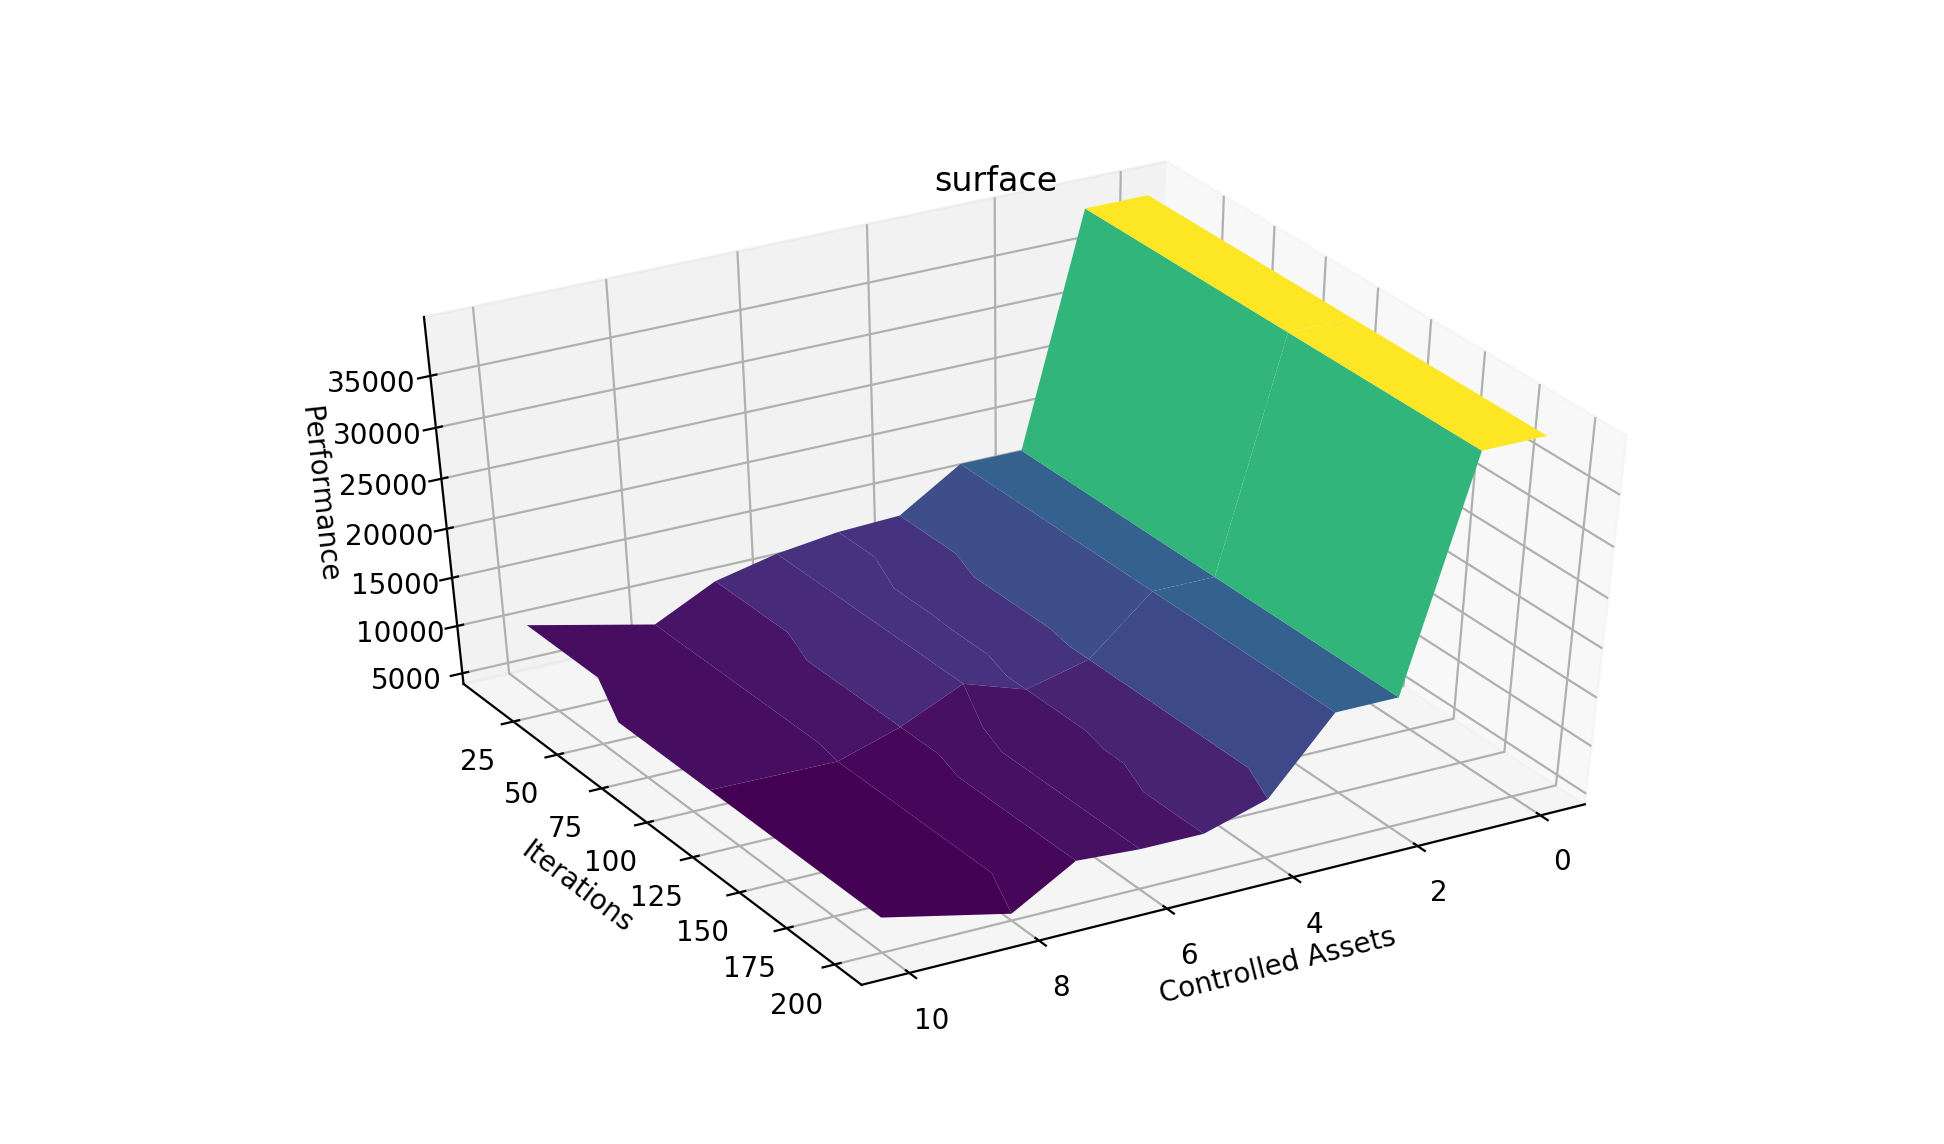

Text(0.5, 0, 'Performance')

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, plot_matrix.T, rstride=10, cstride=1, cmap=plt.cm.viridis, linewidth=0, shade=False)
ax.set_title('surface')
ax.set_ylabel("Iterations")
ax.set_xlabel("Controlled Assets")
ax.set_zlabel("Performance")

**Bayesian Optimizers performance on the controlling 2 to 11 assets with 200 acquisitions (lower the better). As the acquisitions increase you can observe the performance of the assets converging. Though in the above figure you can only observe the convergence for 2,3,4. As the action space increases it might require more acquisitions to converge onto a "global" optimal, which is resonable.**

<IPython.core.display.Javascript object>


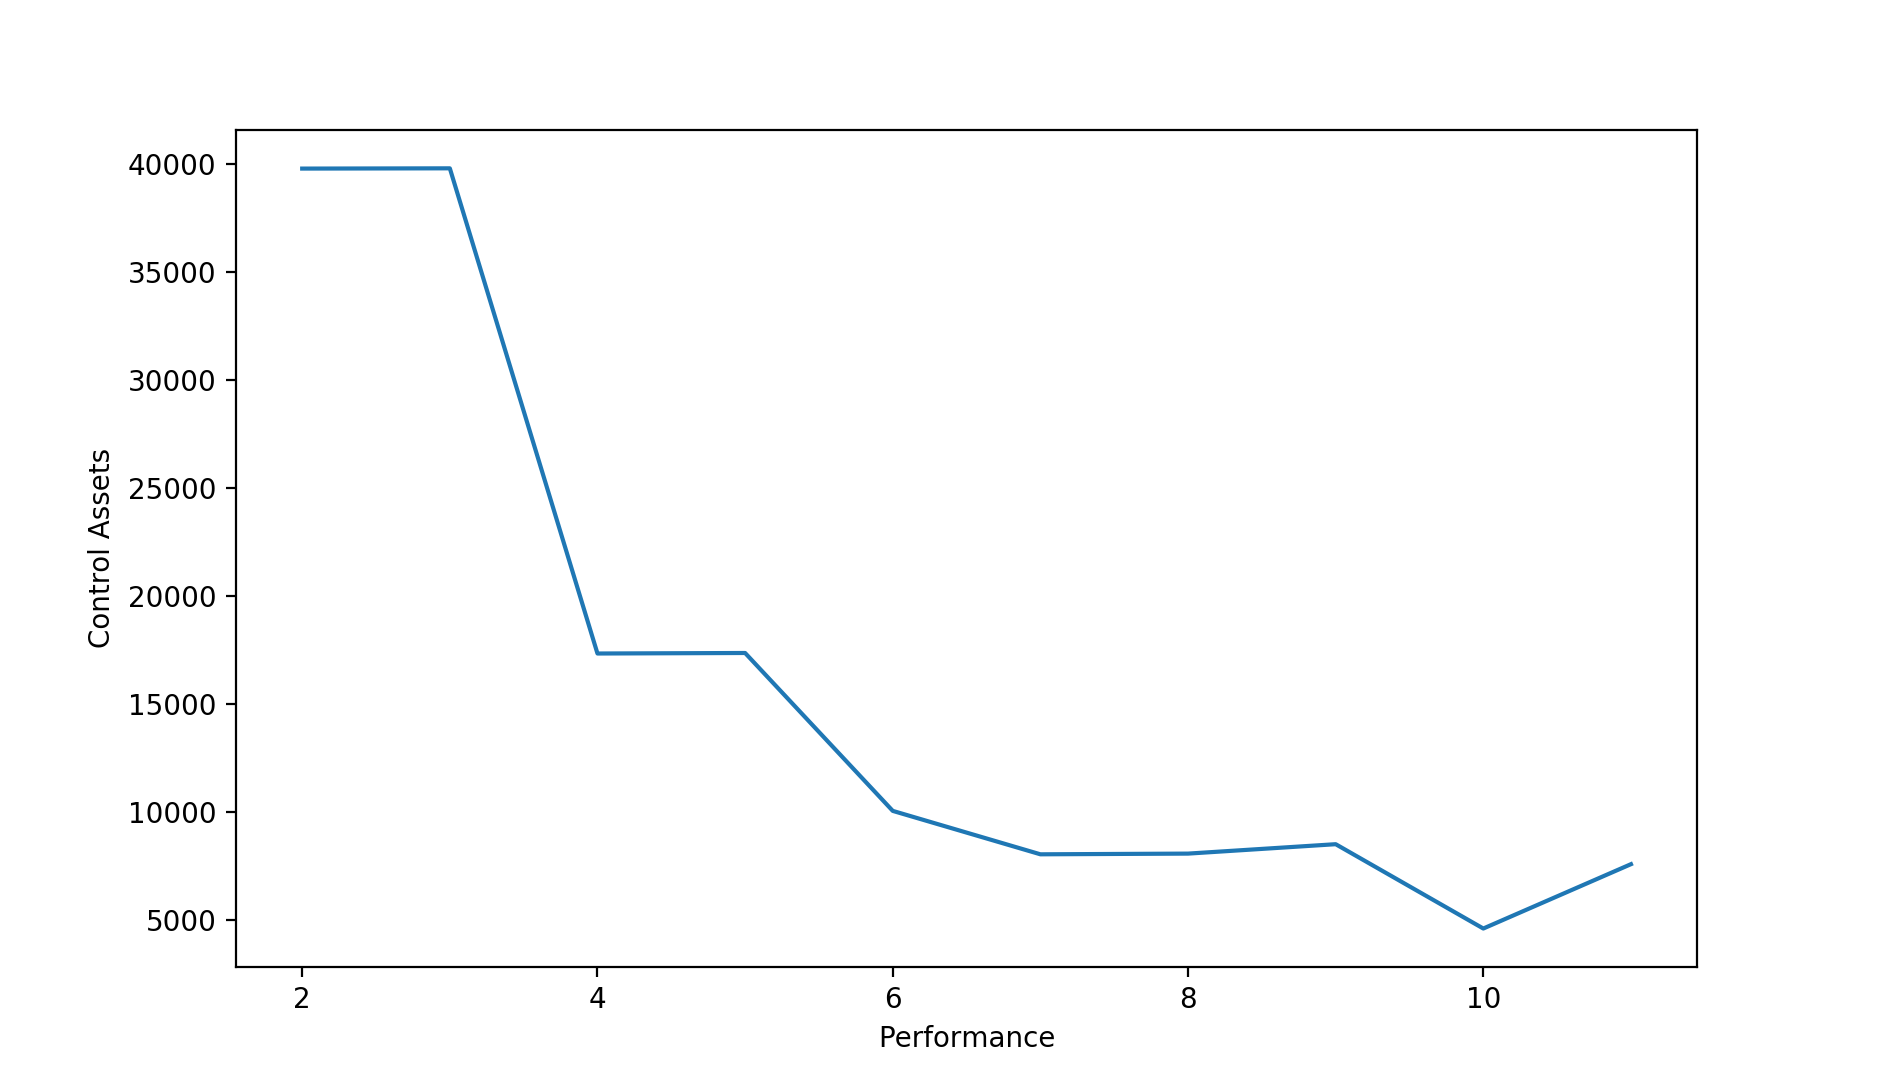

Text(0.5, 0, 'Performance')

In [17]:
plt.plot(np.linspace(2, 11, 10, dtype=int), plot_matrix[:,-1])
plt.ylabel("Control Assets")
plt.xlabel("Performance")

**Final performance of the bayesian optimizer for 200 iterations** you can observe that the performance of the 11 assets is bad than the 10. This can attributed to many isses. Ideally you want to run more simulations on the whole thing. If you look at the next figure, you can see the discrepency in the simulation results. 

### 1000 iterations of 11 ponds

In [2]:
path = "./Figure2-Controllers/Figure2 - version 3/11_pond_fig2/performance_bayopt.npy"
temp = np.load(path).item()
per1000 = temp["performance"]
path = "./Figure2-Controllers/Figure2 - version 2/11_pond_fig2/performance_bayopt.npy"
temp = np.load(path).item()
per100  = temp["performance"]
path = "./32_11_Ponds_Fig2/performance_bayopt_11_RandomSeed_32.npy"
temp = np.load(path).item()
per300_32  = temp["performance"]
path = "./64_11_Ponds_Fig2/performance_bayopt_11_RandomSeed_64.npy"
temp = np.load(path).item()
per300_64  = temp["performance"]
path = "./128_11_Ponds_Fig2/performance_bayopt_11_RandomSeed_128.npy"
temp = np.load(path).item()
per300_128 = temp["performance"]

<IPython.core.display.Javascript object>


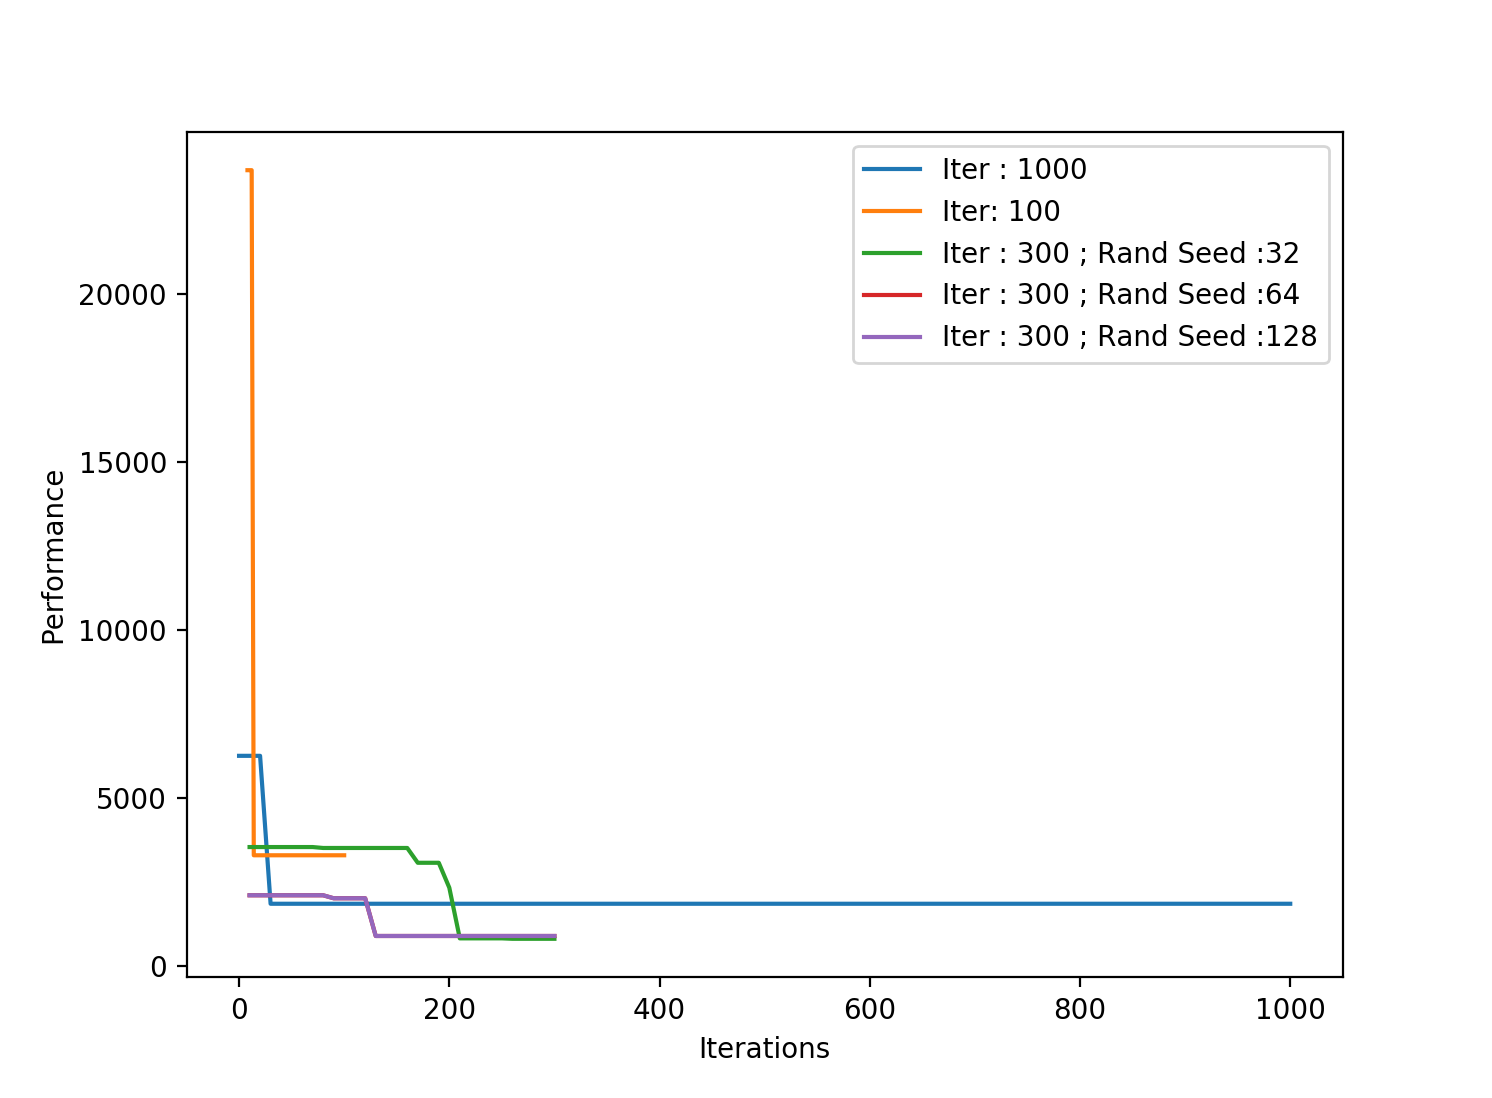

In [5]:
plt.plot(np.linspace(0, 1000, 100, dtype=int), per1000, label="Iter : 1000")
plt.plot(np.linspace(2, 100, 50, dtype=int)[3:], per100[3:], label="Iter: 100")
plt.plot(np.linspace(10, 300, 30, dtype=int), per300_32, label="Iter : 300 ; Rand Seed :32")
plt.plot(np.linspace(10, 300, 30, dtype=int), per300_64, label="Iter : 300 ; Rand Seed :64")
plt.plot(np.linspace(10, 300, 30, dtype=int), per300_64, label="Iter : 300 ; Rand Seed :128")
plt.ylabel("Performance")
plt.xlabel("Iterations")
plt.legend()
plt.show()

When you run more simulations to see wheather bayesian optimizer converges onto a solution for 11 control assets, you can observe that the convergence into a solution is dependent on the random seed. This leads to the observation that, this might be the case for the others large scale control problems (i.e. when we are controlling 6,7,8,9, 10 assets). So to ideally generate the performance convergerce plot, we would have to run the multiple simulations with different random seeds for a particular storm on a on the particular network.